# Decision Tree

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt #or (import matplotlib.pyplot as plt )

In [51]:
var = pd.read_csv('PlayTennis.csv')
var

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
outlook=LabelEncoder()
temp=LabelEncoder()
humidity=LabelEncoder()
windy=LabelEncoder()
play=LabelEncoder()

In [54]:
var['outlook']=outlook.fit_transform(var['outlook'])
var['temp']=temp.fit_transform(var['temp'])
var['humidity']=humidity.fit_transform(var['humidity'])
var['windy']=windy.fit_transform(var['windy'])
var['play']=play.fit_transform(var['play'])

In [55]:
var

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


In [56]:
features_Cols=['outlook','temp','humidity','windy']
X=var[features_Cols]
y=var.play

In [57]:
X

,outlook,temp,humidity,windy
0,2,1,0,0
1,2,1,0,1
2,0,1,0,0
3,1,2,0,0
4,1,0,1,0
5,1,0,1,1
6,0,0,1,1
7,2,2,0,0
8,2,0,1,0
9,1,2,1,0


In [58]:
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int64

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [61]:
from sklearn.tree import DecisionTreeClassifier


In [62]:
classifier=DecisionTreeClassifier(criterion='gini') #can be criterion='entropy'

In [63]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [64]:
classifier.predict(X_test)

array([1, 1, 1])

In [65]:
X_test

,outlook,temp,humidity,windy
12,0,1,1,0
1,2,1,0,1
0,2,1,0,0


In [68]:
classifier.score(X_test,y_test)

0.3333333333333333

[Text(0.375, 0.9, 'x[0] <= 0.5\ngini = 0.397\nsamples = 11\nvalue = [3, 8]'),
 Text(0.25, 0.7, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.5, 0.7, 'x[3] <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.25, 0.5, 'x[0] <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.375, 0.3, 'x[1] <= 1.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.5, 'x[0] <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.625, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

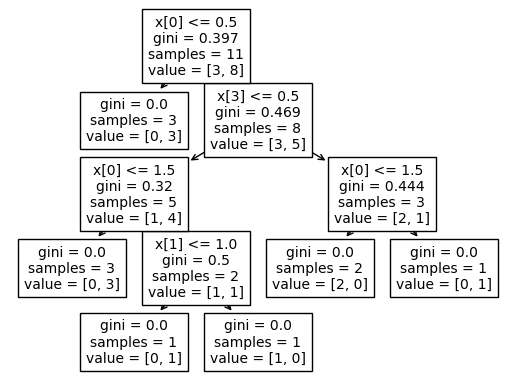

In [69]:
from sklearn import tree
tree.plot_tree(classifier)